Cargamos primero los paquetes necesarios:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from astropy import constants as const
from astropy import units as u
from mpmath import diff

Avancemos ahora paso por paso según el procedimiento sugerido:

### Paso 1
Leamos el archivo dado como un array de numpy:

In [2]:
dat=np.loadtxt("mapa.txt")

Visualizemos este mapa de masa superponiento algunos contornos:

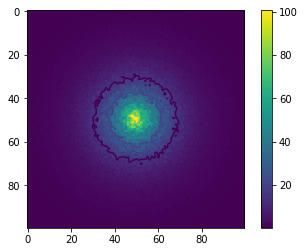

In [3]:
plt.contour(dat)
plt.imshow(dat)
plt.colorbar()
plt.show()

Comprobamos así que la distribución de masa es simétrica axialmente.
### Paso 2
Determinemos la distancia de cada pixel, $\mathtt{R}$, hasta el centro de la imagen, $\mathtt{(x,y)}$; usando las coordenadas de cada pixel en la imagen, $\mathtt{(X,Y)}$:

In [4]:
x=np.arange(100)
y=np.arange(100)
Y,X=np.meshgrid(x,y)
x,y= 49.5,49.5
R=np.sqrt((X-x)**2+(Y-y)**2)

Graficamos la densidad contra el radio de cada pixel en la imagen:

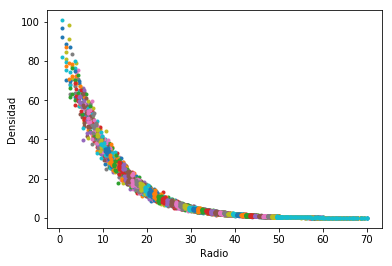

In [5]:
plt.plot(R,dat,'.')
plt.xlabel("Radio")
plt.ylabel("Densidad")
plt.show()

Para realizar el promedio de las densidades primero guardamos las masas y radios en arrays uno dimensionales en vez de tenerlos en arrays dos dimensionales:

In [6]:
d=[]
rad=[]
for i in range(100):
    for j in range(100):
        d.append(dat[i,j])
        rad.append(R[i,j])

Ordenamos las masas se según su distancia al centro, en orden ascendente y la guardamos en el array $\mathtt{dis}$:

In [7]:
dis=[]
RAD=rad.copy()
rad.sort()
l=0
for i in range(len(RAD)):
    if i==0:
        j=RAD.index(rad[i])
        dis.append(d[j])
    else:
        if rad[i-1]==rad[i]:
            if l==0:
                k=RAD.index(rad[i])
                j=RAD[k+1:].index(rad[i])
                dis.append(d[k+1+j])
                l=2
                m=k
                n=j
            else:
                m=m+n+l
                n=RAD[m:].index(rad[i])
                dis.append(d[n+m])
                l=1
        else:
            l=0
            j=RAD.index(rad[i])
            dis.append(d[j])

Calculamos el promedio de las densidades en intervalos de 2 pixeles:

In [8]:
prom=[]
for i in range(0,9999,2):
    prom.append(np.mean(dis[i:i+2]))

### Paso 3

Guardamos el perfil promedio en un array dos dimensional:

In [9]:
pm=np.zeros([100,50])
for i in range(100):
    for j in range(50):
        pm[i,j]=prom[i+j]

Graficamos la información anterior:

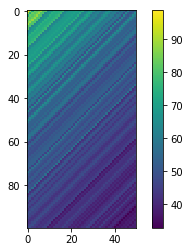

In [10]:
plt.imshow(pm)
plt.colorbar()
plt.show()

### Paso 4

Calculamos la integral pedida para diferentes valores de $r$, usando la siguiente rutina:

In [11]:
def Int(x):
    
    def f(phi,r1):
        return 1/np.sqrt((r1**2)+(x**2)-(2*x*r1*np.cos(phi)))
    
    I1=integrate.dblquad(f,0,x-1,lambda x: 0, lambda x: 2*np.pi)[0]
    I2=integrate.dblquad(f,x+1,np.inf,lambda x: 0, lambda x: 2*np.pi)[0]
    return I1+I2

radial=[]
A=np.linspace(np.min(rad),np.max(rad),50)
for i in A:
    radial.append(Int(i))

/home/jorgerd/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


Graficamos la información anterior:

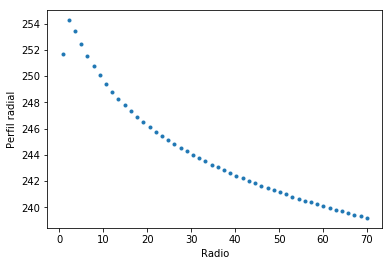

In [12]:
plt.plot(A,radial,'.')
plt.xlabel("Radio")
plt.ylabel("Perfil radial")
plt.show()

### Paso 6

Calculamos el potencial gravitacional para cada pixel, usando $V=-\frac{Gm}{r}$:

In [13]:
V=(-const.G.value*dat)/R

Construimos el mapa de $V$ para cada pixel:

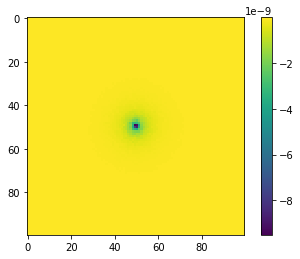

In [14]:
plt.imshow(V)
plt.colorbar()
plt.show()

Calculamos la aceleración gravitacional de cada pixel teniendo en cuenta que $a_g=-\nabla V$:

In [15]:
ac=dat.copy()
def g(x,y):
    return (-const.G.value*z)/np.sqrt((49.5-x)**2+(49.5-y)**2)
for i in range(100):
    for j in range (100):
        z=dat[i,j]
        parcial_x=diff(g,(i,j),(1,0))
        parcial_y=diff(g,(i,j),(0,1))
        ac[i,j]=np.sqrt(parcial_x**2+parcial_y**2)

Graficamos un mapa del módulo de la aceleración en cada pixel:

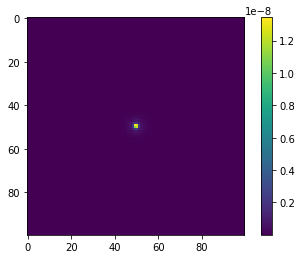

In [16]:
plt.imshow(ac)
plt.colorbar()
plt.show()